**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**ÁRVORES, REDES E ENSEMBLE MODELS**<br>
**Prof. João Fernando Serrajordia Rocha de Melo**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>

*coding: utf-8*

In [6]:
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

from funcoes_ajuda import avalia_clf

In [9]:
#%% Carregando a base

titanic = pd.read_pickle('data/titanic1.pkl')
# titanic = pd.read_parquet('titanic1.parquet')

titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [11]:
#%%  Dividindo a base em treino e teste

# Selecionar variáveis preditoras e a variável resposta
X = titanic.drop(columns = ['survived'])
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# conferindo número de linhas e colunas
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 8)
(668,)
(223, 8)
(223,)


In [12]:
#%% Treinando a árvore

# Criar o modelo de árvore de decisão
arvore = DecisionTreeClassifier(criterion='gini', 
                                max_depth = 3, 
                                random_state=42)

# Treinar o modelo
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 82.9%
A acurácia balanceada da árvore é: 81.2%
AUC-ROC: 87.75%
GINI: 75.49%

               precision    recall  f1-score   support

           0       0.83      0.90      0.86       404
           1       0.82      0.73      0.77       264

    accuracy                           0.83       668
   macro avg       0.83      0.81      0.82       668
weighted avg       0.83      0.83      0.83       668



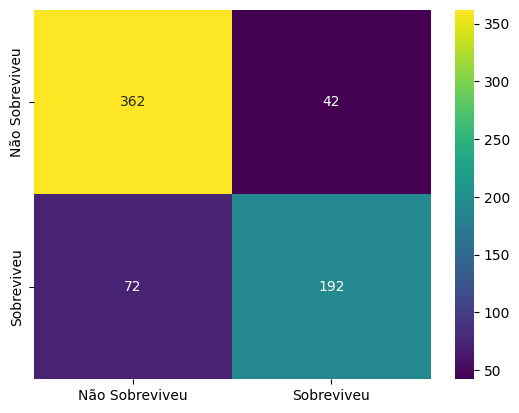

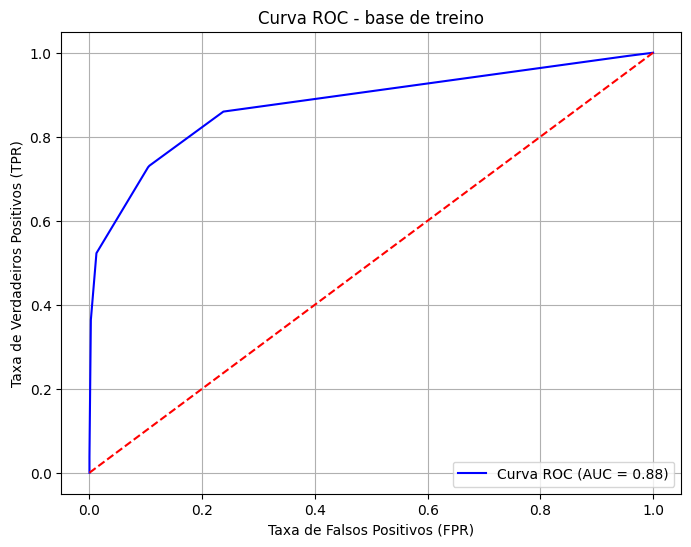

In [13]:
#%% Avaliando o modelo na base de treino

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train)

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 79.8%
A acurácia balanceada da árvore é: 76.2%
AUC-ROC: 79.71%
GINI: 59.43%

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.75      0.64      0.69        78

    accuracy                           0.80       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.80      0.79       223



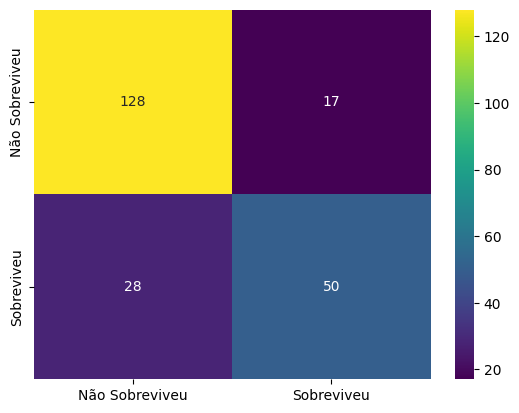

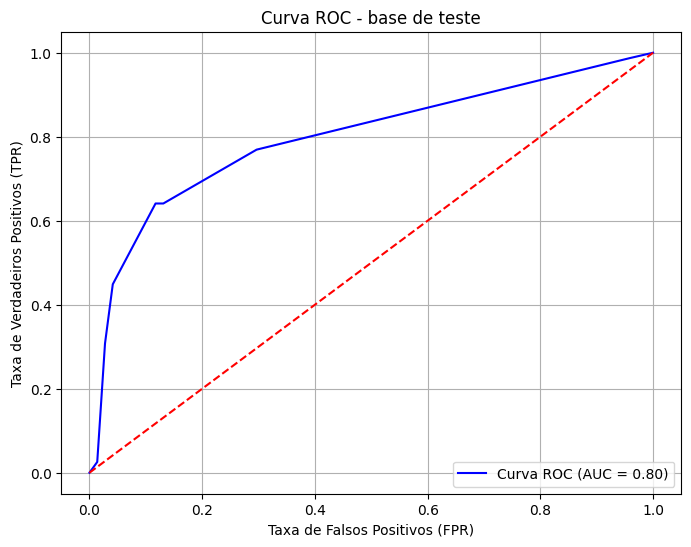

In [15]:
#%% Avaliando o modelo na base de teste
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')

In [16]:
#%%  Deixando a árvore ser feliz

arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=0)

# Treinar o modelo
arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=30, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 98.5%
A acurácia balanceada da árvore é: 98.2%
AUC-ROC: 99.94%
GINI: 99.89%

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       404
           1       1.00      0.97      0.98       264

    accuracy                           0.99       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.99      0.99      0.98       668



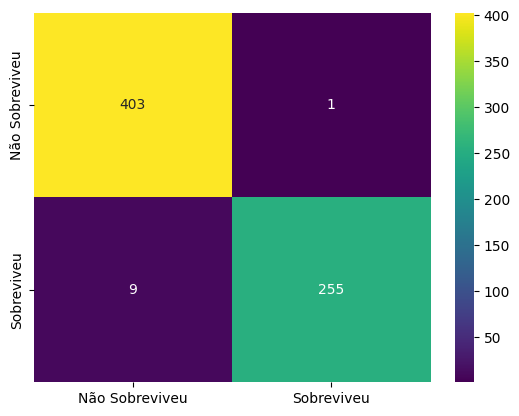

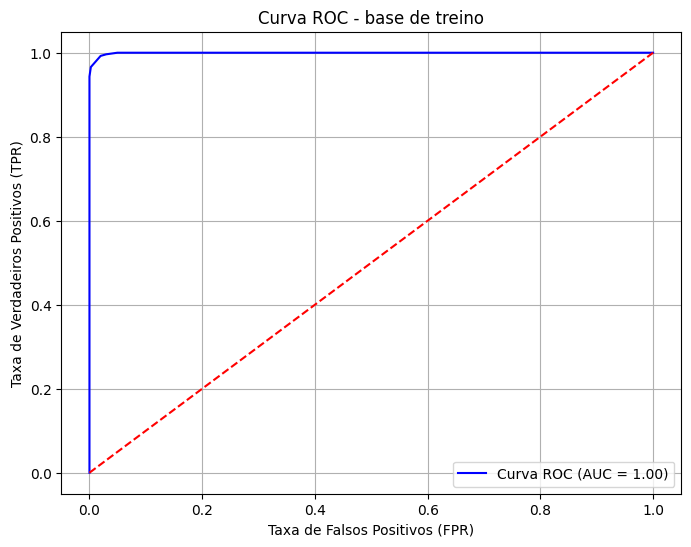

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 76.2%
A acurácia balanceada da árvore é: 74.0%
AUC-ROC: 74.37%
GINI: 48.74%

               precision    recall  f1-score   support

           0       0.82      0.81      0.82       145
           1       0.66      0.67      0.66        78

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



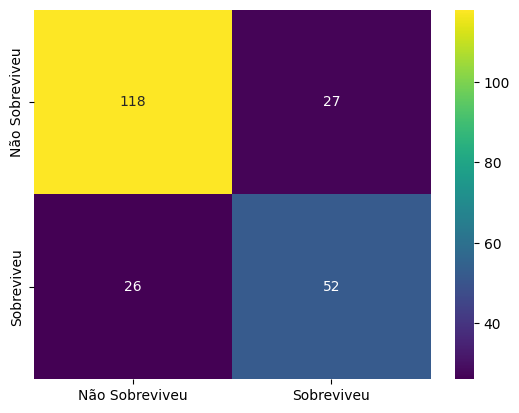

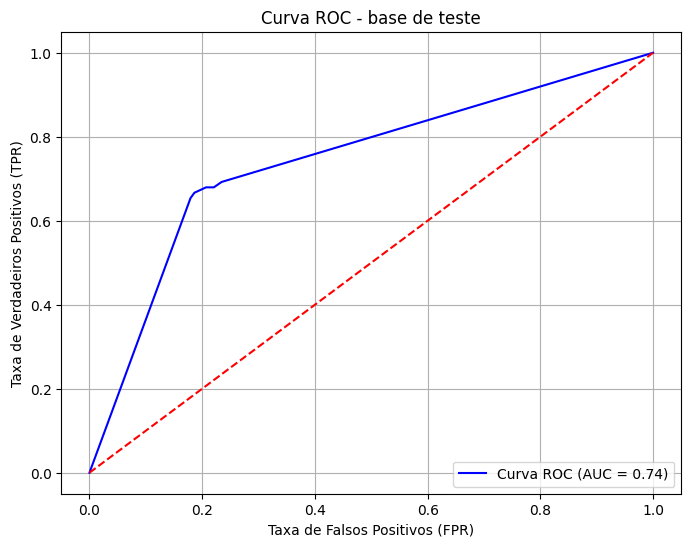

In [17]:
#%% Avaliando o modelo na base de treino e teste

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')

O GINI máximo é de: 64.52%
Obtido com um ccp de: 0.0025527891585250557


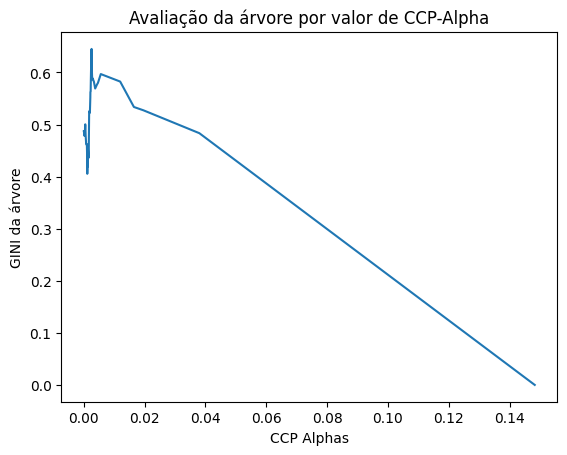

In [23]:
#%% ccp_alpha

ccp_path = pd.DataFrame(arvore.cost_complexity_pruning_path(X_train, y_train))

#%% Tunando a árvore

GINIs = []

for ccp in ccp_path['ccp_alphas']:
    arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                    random_state=42,
                                    ccp_alpha=ccp)

    # Treinar o modelo
    arvore.fit(X_train, y_train)
    AUC = roc_auc_score(y_test, arvore.predict_proba(X_test)[:, -1])
    GINI = (AUC-0.5)*2
    GINIs.append(GINI)

sns.lineplot(x = ccp_path['ccp_alphas'], y = GINIs)

df_avaliacoes = pd.DataFrame({'ccp': ccp_path['ccp_alphas'], 'GINI': GINIs})

GINI_max = df_avaliacoes.GINI.max()
ccp_max  = df_avaliacoes.loc[df_avaliacoes.GINI == GINI_max, 'ccp'].values[0]

plt.ylabel('GINI da árvore')
plt.xlabel('CCP Alphas')
plt.title('Avaliação da árvore por valor de CCP-Alpha')

print(f'O GINI máximo é de: {GINI_max:.2%}\nObtido com um ccp de: {ccp_max}')

In [24]:
#%% Árvore ótima

arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=ccp_max).fit(X_train, y_train)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 88.9%
A acurácia balanceada da árvore é: 87.4%
AUC-ROC: 91.19%
GINI: 82.37%

               precision    recall  f1-score   support

           0       0.88      0.95      0.91       404
           1       0.91      0.80      0.85       264

    accuracy                           0.89       668
   macro avg       0.89      0.87      0.88       668
weighted avg       0.89      0.89      0.89       668



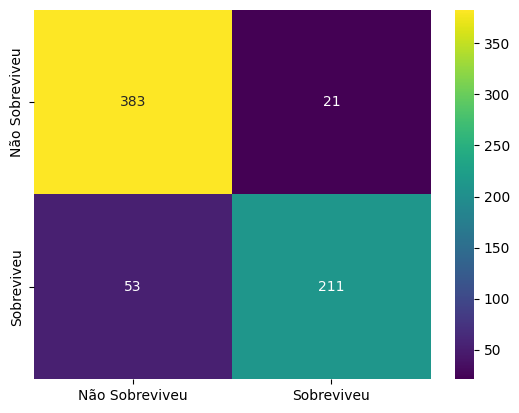

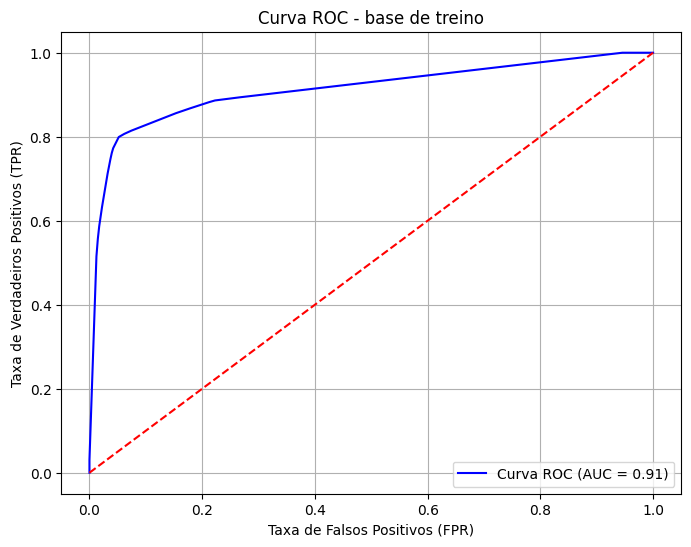

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 80.3%
A acurácia balanceada da árvore é: 76.2%
AUC-ROC: 82.26%
GINI: 64.52%

               precision    recall  f1-score   support

           0       0.82      0.90      0.86       145
           1       0.77      0.63      0.69        78

    accuracy                           0.80       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.80      0.80      0.80       223



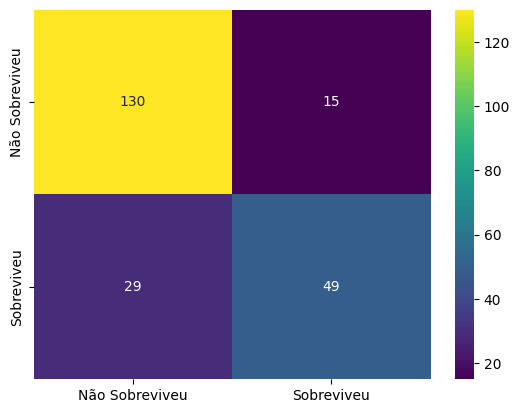

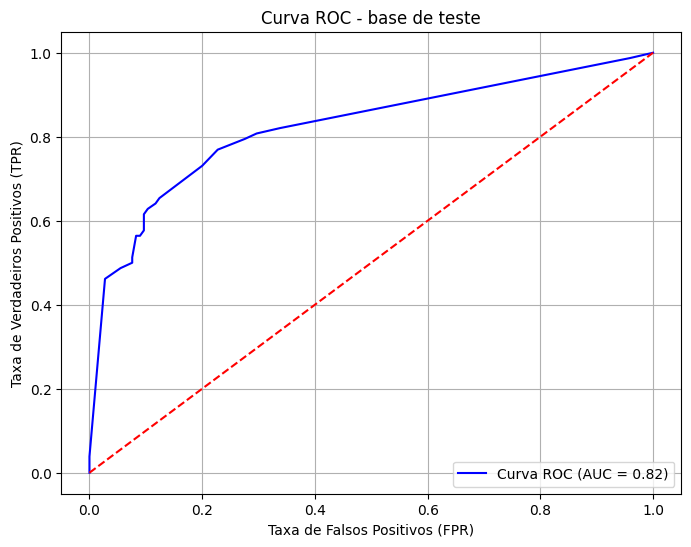

In [25]:
#%% avaliar

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')